## Python libraries

In [261]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Importing the data

### Indian states

In [262]:
states = gpd.read_file('C:\\Ellen\\personal\\blog\\GDP_india\\data\\States\\Admin2.shp')

In [263]:
states.head()

,ST_NM,geometry
0,Arunachal Pradesh,"POLYGON ((96.08866 29.45997, 96.09428 29.45477..."
1,Assam,"POLYGON ((95.97166 27.96254, 95.97174 27.96227..."
2,Chandigarh,"POLYGON ((76.77175 30.79498, 76.77231 30.79420..."
3,Karnataka,"POLYGON ((77.32647 18.45884, 77.32648 18.45803..."
4,Manipur,"POLYGON ((94.57315 25.69156, 94.57522 25.69094..."


In [264]:
states.shape

(36, 2)

<Axes: >

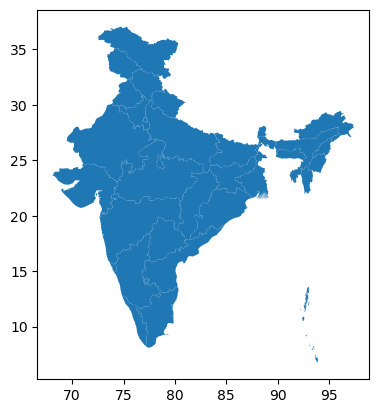

In [265]:
states.plot()

## Gross Domestic Product per State (GSPD)

In [266]:
# gspd = pd.read_excel('C:\\Ellen\\personal\\blog\\GDP_india\\data\\State_GDP_Trends_1723358631208.xlsx')
# gspd.head()

In [267]:
gspd = pd.read_excel('C:\\Ellen\\personal\\blog\\GDP_india\\data\\27T_15112023E301A02422494F73BFAFD6CDD84EEEAE.XLSX', sheet_name = 'T_27(iv)')
gspd

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,TABLE 27: GROSS STATE DOMESTIC PRODUCT,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,(Current Prices) (Concld.),NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,(₹ Lakh),NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,State/Union Territory,Base: 2011-12,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
5,NaN,Andaman & Nicobar Islands,789041,900318,976500,931040,1037052,-
6,NaN,Andhra Pradesh,78613542,87372111,92583912,95678770,113383650,131772815
7,NaN,Arunachal Pradesh,2247478,2533487,3002365,3054781,3512354,-
8,NaN,Assam,28316489,30933632,34685068,35360542,41261187,49316660
9,NaN,Bihar,46874631,52797582,58185548,56726250,65030243,75139559


In [268]:
# Delete the first column
gspd = gspd.iloc[: , 1:]
# Create the column names from the fifth row
# Remember in Python that the index starts from zero in Python
column_names = gspd.iloc[4,1:]
#print(type(column_names)) # pandas series

# And convert this to a list
cols = column_names.values.tolist()
# Add the "state" as the first element to this list
final_cols = ['state'] + cols

# Set the column headers
gspd.columns = final_cols

# Drop the first five rows
gspd = gspd.iloc[5:]

# Drop the last two rows
gspd = gspd.iloc[:-2]

# Reset the index and let the counter start from zero again
gspd.reset_index(drop=True, inplace = True)

In [269]:
gspd.columns

Index(['state', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22',
       '2022-23'],
      dtype='object')

In [270]:
gspd.shape

(34, 7)

In [271]:
gspd.describe()

,state,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
count,34,34,34,34,34,34,34
unique,34,34,34,34,34,34,23
top,Andaman & Nicobar Islands,789041,900318,976500,931040,1037052,-
freq,1,1,1,1,1,1,12


In [272]:
for i in gspd.columns[1:]:
    print(f"For the year {i}, there are {gspd[i].value_counts()['-']} missing values.")

For the year 2017-18, there are 1 missing values.
For the year 2018-19, there are 1 missing values.
For the year 2019-20, there are 1 missing values.
For the year 2020-21, there are 1 missing values.
For the year 2021-22, there are 1 missing values.
For the year 2022-23, there are 12 missing values.


In [273]:
gspd = gspd.loc[:, ['state', '2021-22']]
gspd

,state,2021-22
0,Andaman & Nicobar Islands,1037052
1,Andhra Pradesh,113383650
2,Arunachal Pradesh,3512354
3,Assam,41261187
4,Bihar,65030243
5,Chandigarh,4563526
6,Chhattisgarh,40641582
7,Delhi,90464204
8,Goa,8260370
9,Gujarat,193706646


In [274]:
gspd.shape

(34, 2)

In [275]:
gspd.sort_values('2021-22')

TypeError: '<' not supported between instances of 'str' and 'int'

In [276]:
gspd.dtypes

state      object
2021-22    object
dtype: object

In [277]:
#gspd['2021-22'] = gspd['2021-22'].astype(int)
short = gspd.iloc[0:10,:]
print(short)
short = short['2021-22'].astype(int)
print(short)

                       state    2021-22
0  Andaman & Nicobar Islands    1037052
1             Andhra Pradesh  113383650
2          Arunachal Pradesh    3512354
3                      Assam   41261187
4                      Bihar   65030243
5                 Chandigarh    4563526
6               Chhattisgarh   40641582
7                      Delhi   90464204
8                        Goa    8260370
9                    Gujarat  193706646
0      1037052
1    113383650
2      3512354
3     41261187
4     65030243
5      4563526
6     40641582
7     90464204
8      8260370
9    193706646
Name: 2021-22, dtype: int32


In [278]:
gspd

,state,2021-22
0,Andaman & Nicobar Islands,1037052
1,Andhra Pradesh,113383650
2,Arunachal Pradesh,3512354
3,Assam,41261187
4,Bihar,65030243
5,Chandigarh,4563526
6,Chhattisgarh,40641582
7,Delhi,90464204
8,Goa,8260370
9,Gujarat,193706646


In [279]:
short.dtypes

dtype('int32')

In [280]:
short

0      1037052
1    113383650
2      3512354
3     41261187
4     65030243
5      4563526
6     40641582
7     90464204
8      8260370
9    193706646
Name: 2021-22, dtype: int32

In [281]:
gspd

,state,2021-22
0,Andaman & Nicobar Islands,1037052
1,Andhra Pradesh,113383650
2,Arunachal Pradesh,3512354
3,Assam,41261187
4,Bihar,65030243
5,Chandigarh,4563526
6,Chhattisgarh,40641582
7,Delhi,90464204
8,Goa,8260370
9,Gujarat,193706646


In [282]:
gspd.drop([12], inplace = True)

In [283]:
gspd

,state,2021-22
0,Andaman & Nicobar Islands,1037052
1,Andhra Pradesh,113383650
2,Arunachal Pradesh,3512354
3,Assam,41261187
4,Bihar,65030243
5,Chandigarh,4563526
6,Chhattisgarh,40641582
7,Delhi,90464204
8,Goa,8260370
9,Gujarat,193706646


In [284]:
gspd = gspd.astype({'2021-22':'int'})

In [285]:
gspd

,state,2021-22
0,Andaman & Nicobar Islands,1037052
1,Andhra Pradesh,113383650
2,Arunachal Pradesh,3512354
3,Assam,41261187
4,Bihar,65030243
5,Chandigarh,4563526
6,Chhattisgarh,40641582
7,Delhi,90464204
8,Goa,8260370
9,Gujarat,193706646


In [286]:
gspd.sort_values('2021-22', ascending = False)

,state,2021-22
18,Maharashtra,310802187
28,Tamil Nadu,207128616
31,Uttar Pradesh,197453155
15,Karnataka,196272542
9,Gujarat,193706646
33,West Bengal,136392586
26,Rajasthan,121819345
17,Madhya Pradesh,113613719
1,Andhra Pradesh,113383650
29,Telangana,112890724


In [287]:
states['ST_NM']

0                            Arunachal Pradesh
1                                        Assam
2                                   Chandigarh
3                                    Karnataka
4                                      Manipur
5                                    Meghalaya
6                                      Mizoram
7                                     Nagaland
8                                       Punjab
9                                    Rajasthan
10                                      Sikkim
11                                     Tripura
12                                 Uttarakhand
13                                   Telangana
14                                       Bihar
15                                      Kerala
16                              Madhya Pradesh
17                           Andaman & Nicobar
18                                     Gujarat
19                                 Lakshadweep
20                                      Odisha
21    Dadra a

In [288]:
# states = states.astype({'ST_NM':'str'})

In [289]:
states_sorted = states.sort_values('ST_NM')
states_sorted['ST_NM']

17                           Andaman & Nicobar
32                              Andhra Pradesh
0                            Arunachal Pradesh
1                                        Assam
14                                       Bihar
2                                   Chandigarh
23                                Chhattisgarh
21    Dadra and Nagar Haveli and Daman and Diu
24                                       Delhi
25                                         Goa
18                                     Gujarat
26                                     Haryana
27                            Himachal Pradesh
22                             Jammu & Kashmir
28                                   Jharkhand
3                                    Karnataka
15                                      Kerala
35                                      Ladakh
19                                 Lakshadweep
16                              Madhya Pradesh
34                                 Maharashtra
4            

In [294]:
gspd_sorted = gspd.sort_values('state')
gspd_sorted['state']

0     Andaman & Nicobar Islands
1                Andhra Pradesh
2             Arunachal Pradesh
3                         Assam
4                         Bihar
5                    Chandigarh
6                  Chhattisgarh
7                         Delhi
8                           Goa
9                       Gujarat
10                      Haryana
11             Himachal Pradesh
13         Jammu & Kashmir-U.T.
14                    Jharkhand
15                    Karnataka
16                       Kerala
17               Madhya Pradesh
18                  Maharashtra
19                      Manipur
20                    Meghalaya
21                      Mizoram
22                     Nagaland
23                       Odisha
24                   Puducherry
25                       Punjab
26                    Rajasthan
27                       Sikkim
28                   Tamil Nadu
29                    Telangana
30                      Tripura
31                Uttar Pradesh
32      

In [296]:
states

,ST_NM,geometry
0,Arunachal Pradesh,"POLYGON ((96.08866 29.45997, 96.09428 29.45477..."
1,Assam,"POLYGON ((95.97166 27.96254, 95.97174 27.96227..."
2,Chandigarh,"POLYGON ((76.77175 30.79498, 76.77231 30.79420..."
3,Karnataka,"POLYGON ((77.32647 18.45884, 77.32648 18.45803..."
4,Manipur,"POLYGON ((94.57315 25.69156, 94.57522 25.69094..."
5,Meghalaya,"POLYGON ((91.82534 26.11950, 91.82610 26.11935..."
6,Mizoram,"POLYGON ((92.76350 24.52122, 92.76374 24.52108..."
7,Nagaland,"POLYGON ((95.19346 27.03584, 95.19336 27.03560..."
8,Punjab,"POLYGON ((75.83873 32.51270, 75.84163 32.51123..."
9,Rajasthan,"POLYGON ((73.97324 30.12272, 73.97508 30.12008..."


In [297]:
states.rename(columns = {'ST_NM':'state'}, inplace = True)

In [309]:
gspd['state'] = np.where(gspd['state'] == 'Andaman & Nicobar Islands', 'Andaman & Nicobar', gspd['state'])
gspd['state'] = np.where(gspd['state'] == 'Jammu & Kashmir-U.T.', 'Jammu & Kashmir', gspd['state'])
gspd

,state,2021-22
0,Andaman & Nicobar,1037052
1,Andhra Pradesh,113383650
2,Arunachal Pradesh,3512354
3,Assam,41261187
4,Bihar,65030243
5,Chandigarh,4563526
6,Chhattisgarh,40641582
7,Delhi,90464204
8,Goa,8260370
9,Gujarat,193706646


In [298]:
states

,state,geometry
0,Arunachal Pradesh,"POLYGON ((96.08866 29.45997, 96.09428 29.45477..."
1,Assam,"POLYGON ((95.97166 27.96254, 95.97174 27.96227..."
2,Chandigarh,"POLYGON ((76.77175 30.79498, 76.77231 30.79420..."
3,Karnataka,"POLYGON ((77.32647 18.45884, 77.32648 18.45803..."
4,Manipur,"POLYGON ((94.57315 25.69156, 94.57522 25.69094..."
5,Meghalaya,"POLYGON ((91.82534 26.11950, 91.82610 26.11935..."
6,Mizoram,"POLYGON ((92.76350 24.52122, 92.76374 24.52108..."
7,Nagaland,"POLYGON ((95.19346 27.03584, 95.19336 27.03560..."
8,Punjab,"POLYGON ((75.83873 32.51270, 75.84163 32.51123..."
9,Rajasthan,"POLYGON ((73.97324 30.12272, 73.97508 30.12008..."


In [310]:
merged = states.merge(gspd, on='state', how = 'left')

In [311]:
merged

,state,geometry,2021-22
0,Arunachal Pradesh,"POLYGON ((96.08866 29.45997, 96.09428 29.45477...",3512354.0
1,Assam,"POLYGON ((95.97166 27.96254, 95.97174 27.96227...",41261187.0
2,Chandigarh,"POLYGON ((76.77175 30.79498, 76.77231 30.79420...",4563526.0
3,Karnataka,"POLYGON ((77.32647 18.45884, 77.32648 18.45803...",196272542.0
4,Manipur,"POLYGON ((94.57315 25.69156, 94.57522 25.69094...",3659447.0
5,Meghalaya,"POLYGON ((91.82534 26.11950, 91.82610 26.11935...",3878470.0
6,Mizoram,"POLYGON ((92.76350 24.52122, 92.76374 24.52108...",2782350.0
7,Nagaland,"POLYGON ((95.19346 27.03584, 95.19336 27.03560...",3191254.0
8,Punjab,"POLYGON ((75.83873 32.51270, 75.84163 32.51123...",61422676.0
9,Rajasthan,"POLYGON ((73.97324 30.12272, 73.97508 30.12008...",121819345.0


In [301]:
merged.shape

(31, 3)

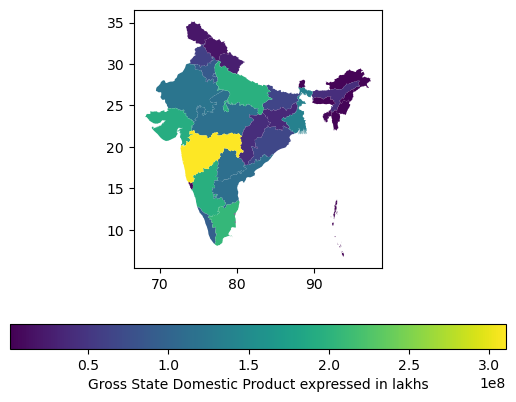

In [315]:
merged.plot(
    column='2021-22', 
    legend = True,
    legend_kwds={"label": "Gross State Domestic Product expressed in lakhs", "orientation": "horizontal"});

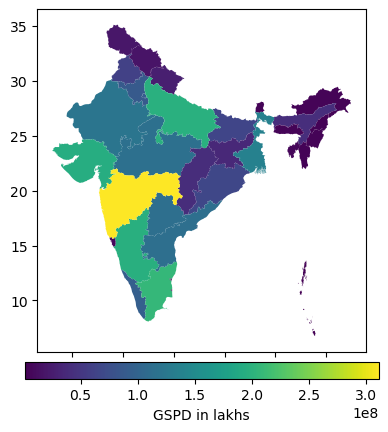

In [317]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("bottom", size="5%", pad=0.1)

merged.plot(
    column="2021-22",
    ax=ax,
    legend=True,
    cax=cax,
    legend_kwds={"label": "GSPD in lakhs", "orientation": "horizontal"},
);

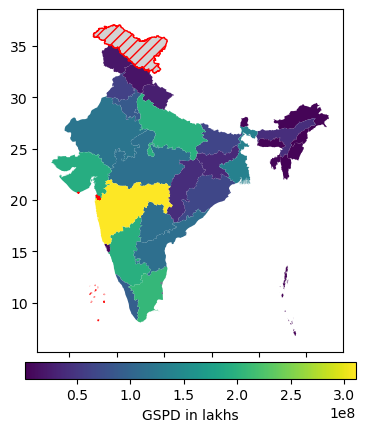

In [319]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("bottom", size="5%", pad=0.1)

merged.plot(
    column="2021-22",
    ax=ax,
    legend=True,
    cax=cax,
    legend_kwds={"label": "GSPD in lakhs", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values"},
);